In [1]:
# import libraries

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import cho.txt dataset

cols = ['Gene_ID', 'Ground_Truth_Cluster_ID', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']
df_cho = pd.read_csv('./Datasets/cho.txt', sep="	", names=cols, header=None)

c:\Users\z1297\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\z1297\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\z1297\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\z1297\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

Text(0, 0.5, 'SSE')

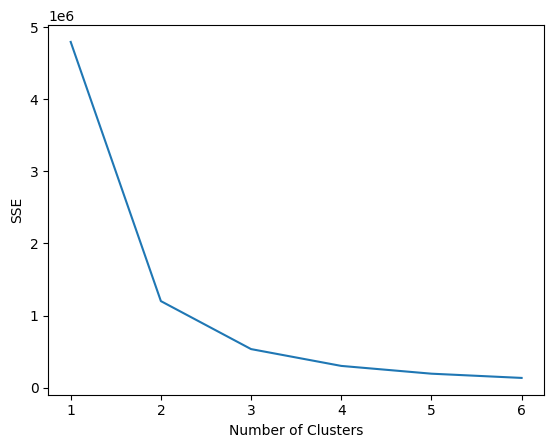

In [3]:
# estimate the number of clusters using a SSE vs. number of clusters graph

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(df_cho)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [4]:
# normalize dataset

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cho)

# PCA with n = 3
pca = PCA(n_components=3).fit(scaled_data)
print('Explained Variance Ratio: ', pca.explained_variance_ratio_)
print('Sum of variance by these 3 components: ', pca.explained_variance_ratio_.cumsum()[2])
print('\nSingular Values: ', pca.singular_values_)

df_cho_3D = pca.transform(scaled_data)

Explained Variance Ratio:  [0.40760319 0.19620284 0.12288723]
Sum of variance by these 3 components:  0.7266932495982633

Singular Values:  [53.21679196 36.92177282 29.22020607]


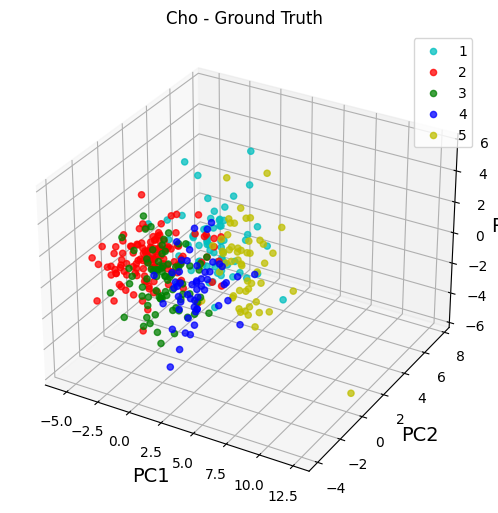

In [11]:
# use PCA to show ground truth label

# set 3 axis
Xax = df_cho_3D[:,0]
Yax = df_cho_3D[:,1]
Zax = df_cho_3D[:,2]

# create figure variables
fig = plt.figure(figsize=(7,5), constrained_layout=True)
ax = fig.add_subplot(111, projection='3d')
cdict = {0:'m', 1:'c', 2:'r', 3:'g', 4:'b', 5:'y'}
y = df_cho.Ground_Truth_Cluster_ID

# draw figure
fig.patch.set_facecolor('white')
for l in np.unique(y):
 i = np.where(y==l)
 ax.scatter(Xax[i], Yax[i], Zax[i], c=cdict[l], s=20, alpha=0.75, label=l)

ax.set_xlabel("PC1", fontsize=14)
ax.set_ylabel("PC2", fontsize=14)
ax.set_zlabel("PC3", fontsize=14)

plt.title('Cho - Ground Truth')
plt.legend()
plt.show()

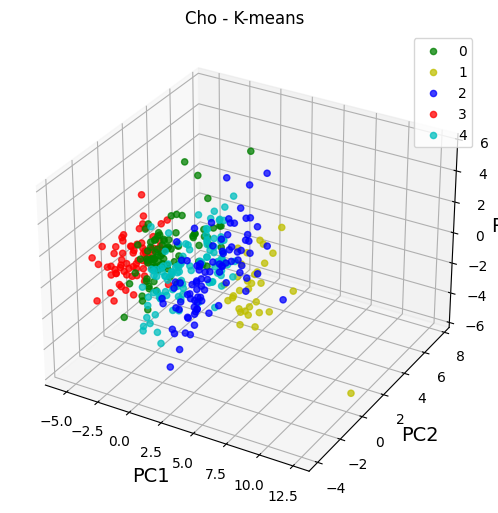

In [15]:
# implement k-means clustering

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=3, random_state=0)
kmeans.fit(df_cho_3D[:, 0:1:2])   # See what happened for Kmeans results and confusion matrix below with the parameter as input

# create figure variables
fig = plt.figure(figsize=(7,5), constrained_layout=True)
ax = fig.add_subplot(111, projection='3d')
cdict = {0:'g', 1:'y', 2:'b', 3:'r', 4:'c'}
y = kmeans.labels_

# draw figure
fig.patch.set_facecolor('white')
for l in np.unique(y):
 i = np.where(y==l)
 ax.scatter(Xax[i], Yax[i], Zax[i], c=cdict[l], s=20, alpha=0.75, label=l)

ax.set_xlabel("PC1", fontsize=14)
ax.set_ylabel("PC2", fontsize=14)
ax.set_zlabel("PC3", fontsize=14)

plt.title('Cho - K-means')
plt.legend()
plt.show()